### DUE: by 11:59pm on February 1, 2022

For this project, you will explore a COVID related dataset. The dataset is provided by Centers for Disease Control and Prevention 
(CDC) and updated weekly. When you submit your work on the due date, the dataset may have been updated already. Please don't worry. Your work will be graded based on the version of the dataset you use.

FIRST, explore download options for the dataset on this link:

https://data.cdc.gov/NCHS/Conditions-Contributing-to-COVID-19-Deaths-by-Stat/hk9y-quqm


### Part 1 [10 points]

Download the data. Then provide some statistical summaries of the data. For example: number of samples, attributes, column names, if missing values are present, quartiles etc.

Note: This part is open ended. Please show at least five different types of summaries.

In [9]:
print("1. Column Names Include: Start Date, End Date, Group, Year, Month, State, Condition Group, Condition, ICD1_codes, Age Group, Covid-19 Deaths, Number of Mentions, and Flag.")

print("2. Based on the current dataset being used there are around 360180 data entries.")

print("3. When a tuple has the 'Group' feature set to 'By Total' the corresponding 'Year' and 'Month' columns are left blank.")

print("4. Among people in the United States suffering from Influenza and Pneumonia as a complications of Covid-19 the 75-84 age group saw the most deaths with 106,024 deaths.")

print("5. For people in Massachusetts suffering with Covid-19 and Diabetes there are no data entries for age groups 0-24 and 35-44.")


1. Column Names Include: Start Date, End Date, Group, Year, Month, State, Condition Group, Condition, ICD1_codes, Age Group, Covid-19 Deaths, Number of Mentions, and Flag.
2. Based on the current dataset being used there are around 360180 data entries.
3. When a tuple has the 'Group' feature set to 'By Total' the corresponding 'Year' and 'Month' columns are left blank.
4. Among people in the United States suffering from Influenza and Pneumonia as a complications of Covid-19 the 75-84 age group saw the most deaths with 106,024 deaths.
5. For people in Massachusetts suffering with Covid-19 and Diabetes there are no data entries for age groups 0-24 and 35-44.


### Part 2 [30 points]

Perform exploratory analysis on the data. Research online for ideas, and then show analysis on at least five different aspects of the dataset. 

Note: This part is open-ended. Any valid analysis is fine. Use visualizations when necessary.

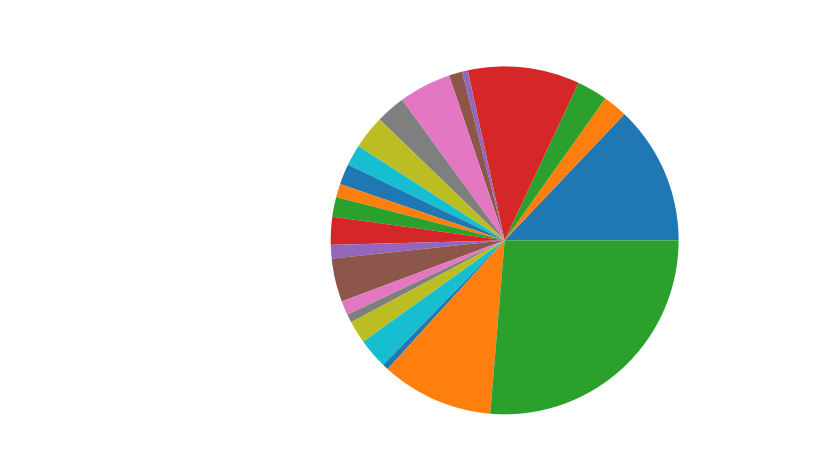

1. As shown by the previous visual - when patients were suffering from COVID-19 ~25 percent of the people that died did not have any additional health complications other than COVID-19.
----------------------------------------------------------------------------------------------------------------
2. 
Percentage of COVID-19 deaths in Puerto Rico in which patients were suffering from cardiac arrest complications 0.03054892601431981
Percentage of COVID-19 deaths in Massachusetts in which patients were suffering from cardiac arrest complications 0.03951651213118215
----------------------------------------------------------------------------------------------------------------
3. As shown by the values and graph - during there winter (Jan - 1, Feb - 2, Dec - 12) months there was a significant increase in influenza relateddeaths for MA residents between the ages of 75-84 during 2021
-------------------------------------------------------------------------------------------------------------

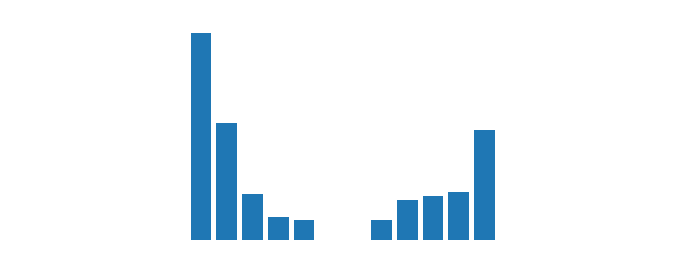

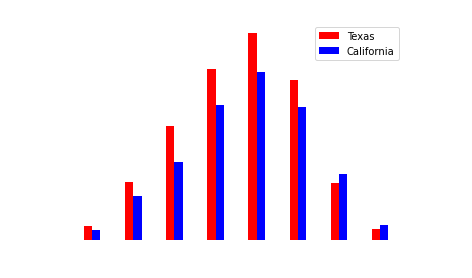

In [10]:


import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
from matplotlib import pyplot as plt
import numpy as np

df = pd.read_csv("CovidData.csv")


# Solution to Part 2 Q1
unitedstates_group_by_total = df.loc[(df['Group'] == 'By Total') & (df['State'] == "United States")]
unitedstates_group_by_total = unitedstates_group_by_total.loc[:, ~unitedstates_group_by_total.columns
    .isin(['Date As Of', 'ICD10_codes', 'Number of Mentions', 'Flag', 'Year', 'Month', 'Start Date', 'End Date'])]

unitedstates_total_deaths = unitedstates_group_by_total.loc[unitedstates_group_by_total['Age Group'] == 'All Ages']
unitedstates_total_deaths['COVID-19 Deaths'] = unitedstates_total_deaths['COVID-19 Deaths'].str.replace(',', '')\
    .astype(float)

pd.to_numeric(unitedstates_total_deaths["COVID-19 Deaths"])

fig = plt.figure(figsize=(8,8))

plt.pie(unitedstates_total_deaths['COVID-19 Deaths'], labels = unitedstates_total_deaths['Condition'], textprops={'color':"w"})
plt.title("Chart of Additional Complications seen in Total United States COVID-19 Deaths", color="white")
plt.show()

print("1. As shown by the previous visual - when patients were suffering from COVID-19 ~25 percent of the people that "
      "died did not have any additional health complications other than COVID-19.")
print("----------------------------------------------------------------------------------------------------------------")

import pandas as pd

pd.options.mode.chained_assignment = None  # default='warn'
from matplotlib import pyplot as plt
import numpy as np

df = pd.read_csv("CovidData.csv")

# Solution to Part 2 Q1
unitedstates_group_by_total = df.loc[(df['Group'] == 'By Total') & ((df['State'] == "Massachusetts") | (df['State'] == "Puerto Rico"))]
unitedstates_group_by_total = unitedstates_group_by_total.loc[:, ~unitedstates_group_by_total.columns.isin(
    ['Date As Of', 'ICD10_codes', 'Number of Mentions', 'Flag', 'Year', 'Month', 'Start Date', 'End Date'])]
unitedstates_total_deaths = unitedstates_group_by_total.loc[unitedstates_group_by_total['Age Group'] == 'All Ages']
unitedstates_total_deaths['COVID-19 Deaths'] = unitedstates_total_deaths['COVID-19 Deaths'].str.replace(',', '').astype(
    float)
pd.to_numeric(unitedstates_total_deaths["COVID-19 Deaths"])
unitedstates_total_deaths = unitedstates_total_deaths.sort_values('COVID-19 Deaths', ascending=False)

ma_df = unitedstates_total_deaths.loc[(unitedstates_total_deaths['State'] == 'Massachusetts')]
total_deaths_ma = ma_df['COVID-19 Deaths'].sum()

pr_df = unitedstates_total_deaths.loc[(unitedstates_total_deaths['State'] == 'Puerto Rico')]
total_deaths_pr = pr_df['COVID-19 Deaths'].sum()

pr_df_cardiac_arrest = pr_df.loc[(pr_df["Condition"] == 'Cardiac arrest')]
ma_df_cardiac_arrest = ma_df.loc[(ma_df["Condition"] == 'Cardiac arrest')]

num_cardiac_pr = pd.to_numeric(pr_df_cardiac_arrest["COVID-19 Deaths"].sum())
num_cardiac_ma = pd.to_numeric(ma_df_cardiac_arrest["COVID-19 Deaths"].sum())

ratio_pr = num_cardiac_pr/total_deaths_pr
ratio_ma = num_cardiac_ma/total_deaths_ma

print("2. ")
print("Percentage of COVID-19 deaths in Puerto Rico in which patients were suffering from cardiac arrest complications", ratio_pr)
print("Percentage of COVID-19 deaths in Massachusetts in which patients were suffering from cardiac arrest complications", ratio_ma)
print("----------------------------------------------------------------------------------------------------------------")
import pandas as pd

pd.options.mode.chained_assignment = None  # default='warn'
from matplotlib import pyplot as plt
import numpy as np

df = pd.read_csv("CovidData.csv")

# Solution to Part 2 Q1
massachusetts_death_month_influenza = df.loc[
    (df['Group'] == 'By Month') & (df['State'] == "Massachusetts") &
    (df['Year'] == '2,021') &
    (df['Age Group'] == '75-84') &
    (df['Condition'] == 'Influenza and pneumonia')]
massachusetts_death_month_influenza = massachusetts_death_month_influenza.loc[:, ~massachusetts_death_month_influenza.columns.isin(
    ['Date As Of', 'ICD10_codes', 'Number of Mentions', 'Flag', 'Year', 'Start Date', 'End Date'])]


Dictionary = {1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5:"May", 6:"Jun", 7: "July", 8: "Aug", 9: "Sep", 10: "Oct",
              11: "Nov", 12: "Dec"}

massachusetts_death_month_influenza['Month']= massachusetts_death_month_influenza['Month'].astype(str)
massachusetts_death_month_influenza["COVID-19 Deaths"] = pd.to_numeric(massachusetts_death_month_influenza["COVID-19 Deaths"])

plt.bar(x=massachusetts_death_month_influenza['Month'], height=massachusetts_death_month_influenza["COVID-19 Deaths"])

plt.title("Number of Influenza & Pneumonia Related Deaths when Patient was Suffering From Covid-19 per Month (2021)", color="white")
plt.xlabel("Month", color="white")
plt.ylabel("Number of Deaths", color="white")
plt.yticks(color="white")
plt.xticks(color="white")
plt.show()

print("3. As shown by the values and graph - during there winter (Jan - 1, Feb - 2, Dec - 12) months there was a significant increase in influenza related"
      "deaths for MA residents between the ages of 75-84 during 2021")
print("----------------------------------------------------------------------------------------------------------------")

import pandas as pd

pd.options.mode.chained_assignment = None  # default='warn'
from matplotlib import pyplot as plt
import numpy as np

df = pd.read_csv("CovidData.csv")

# Solution to Part 2 Q1
print("4. Obesity Related COVID-19 Deaths v Age for California and Texas")
number_deaths_texas = df.loc[
    (df['Group'] == 'By Total') & (df['State'] == "Texas") &
    ((df['Age Group'] != 'All Ages') & (df["Age Group"] != 'Not stated')) &
    (df["Condition"] == "Obesity")]

number_deaths_california = df.loc[
    (df['Group'] == 'By Total') & (df['State'] == "California") &
    ((df['Age Group'] != 'All Ages') & (df["Age Group"] != 'Not stated')) &
    (df["Condition"] == "Obesity")]

number_deaths_california = number_deaths_california.loc[:, ~number_deaths_california.columns.isin(
    ['Date As Of', 'ICD10_codes', 'Number of Mentions', 'Flag', 'Year', 'Start Date', 'End Date'])]
number_deaths_california['COVID-19 Deaths'] = number_deaths_california['COVID-19 Deaths'].str.replace(',', '').astype(
    float)

number_deaths_texas = number_deaths_texas.loc[:, ~number_deaths_texas.columns.isin(
    ['Date As Of', 'ICD10_codes', 'Number of Mentions', 'Flag', 'Year', 'Start Date', 'End Date'])]
number_deaths_texas['COVID-19 Deaths'] = number_deaths_texas['COVID-19 Deaths'].str.replace(',', '').astype(
    float)
x = np.arange(8)
width = .2

plt.bar(x-.2, number_deaths_texas["COVID-19 Deaths"], width, color="red")
plt.bar(x, number_deaths_california["COVID-19 Deaths"], width, color="blue")
plt.xticks(x, number_deaths_california["Age Group"])
plt.legend(["Texas", "California"])
plt.xlabel("Age Group", color = "white")
plt.ylabel("Number of Deaths", color = 'white')
plt.title("Breakdown of Obesity Related Covid Deaths by Age for California and Texas", color = "white")
plt.show()


print("----------------------------------------------------------------------------------------------------------------")
print("5. ")

### Part 3 [15 + 20 + 10 = 45 points]

Observe the "condition groups" column and pick one condition group. Combine all the death related data for that condition group for only the New England states. You can remove the conflicting attributes at this point, but make sure to still retain the age-group information.

a. Perform at least three types of analysis on this data subset. 

b. Perform similar analysis for the rest of the US states.

c. Provide a written summary contrasting your findings from a and b. (minimum 50 words)


Note1: In case you were curious which are the New England states, check this link: https://en.wikipedia.org/wiki/New_England

Note2: Use visualizations when necessary.


### Part 4 [15 points]

For your chosen condition group, what is the median age for COVID-19 related deaths for the New England states?


Note: Part 4 asks you to give a number, not a range of numbers.


### Deliverables:

Put both the datasets and your Jupyter Notebook in a folder, zip it, and submit the zipped file on Canvas. Make sure the zipped file has the following name:

yourLastName_yourFirstName.zip